# Time Series Modeling Project
* Student name: Tara Mullin
* Student pace: Part time
* Scheduled project review date/time: 10/xx/19 xx:xxpm
* Instructor name: Victor Geislinger 
* Blog post URL: TBD

## Project Goal

To forcast real estate prices of various zipcodes using data from Zillow using time-series analysis.

What are the top 5 zip codes to invest in?

Ideas:
* least volitial?
* gained most value?
* more affordable now, but adjacent to valuable zip?
* spread risk across 5 zip codes?


Should recommendations be focused on profit margins only? What about risk? What sort of time horizon to predict against? Recommendations will detail the rationale and will define "best".


# Preparing Data for Modeling & EDA

## Step 1: Load the Data & Filter for Selected Zipcodes

In [1]:
import pandas as pd
zip_data = pd.read_csv("zillow_data.csv")
zip_data.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [2]:
dc_zips = zip_data.loc[zip_data['State'] == 'DC']
dc_zips.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300
33,66133,20009,Washington,DC,Washington,District of Columbia,34,178800.0,179200.0,179600.0,...,1020000,1027500,1034300,1040500,1047400,1055400,1065900,1076400,1081000,1078200
181,66135,20011,Washington,DC,Washington,District of Columbia,182,118900.0,118500.0,118200.0,...,582200,586200,591200,593200,591200,589500,590800,599100,611400,619100
246,66142,20019,Washington,DC,Washington,District of Columbia,247,91300.0,91000.0,90600.0,...,291100,296300,302500,306700,308800,310800,313400,314100,311800,308600
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300


In [3]:
dc_zips.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,66137.444444,20014.500000,2675.000000,189216.666667,188611.111111,188011.111111,187438.888889,186900.000000,186494.444444,186222.222222,...,7.796444e+05,7.829056e+05,7.852778e+05,7.862611e+05,7.881222e+05,7.904500e+05,7.936222e+05,7.988389e+05,8.046000e+05,8.061667e+05
std,8.204893,9.739247,2493.070915,113639.762356,112984.735507,112325.089591,111657.064995,111042.609734,110470.493650,109997.794393,...,3.443848e+05,3.440163e+05,3.421486e+05,3.396671e+05,3.391489e+05,3.395134e+05,3.403082e+05,3.412926e+05,3.427029e+05,3.431798e+05
min,66125.000000,20001.000000,30.000000,85700.000000,85500.000000,85400.000000,85200.000000,85000.000000,84800.000000,84600.000000,...,2.881000e+05,2.934000e+05,2.978000e+05,3.015000e+05,3.037000e+05,3.040000e+05,3.046000e+05,3.068000e+05,3.082000e+05,3.074000e+05
25%,66132.250000,20008.250000,295.000000,106000.000000,105650.000000,105250.000000,104875.000000,104500.000000,104175.000000,104025.000000,...,5.462750e+05,5.479500e+05,5.492750e+05,5.500000e+05,5.486750e+05,5.514000e+05,5.543500e+05,5.610000e+05,5.682000e+05,5.703500e+05
50%,66137.000000,20013.500000,1887.500000,126500.000000,126250.000000,126000.000000,125800.000000,125750.000000,125900.000000,126250.000000,...,7.489000e+05,7.552500e+05,7.610500e+05,7.648000e+05,7.684500e+05,7.711500e+05,7.725500e+05,7.766500e+05,7.830500e+05,7.857500e+05
75%,66141.750000,20018.750000,5329.500000,260800.000000,258900.000000,256925.000000,254950.000000,252950.000000,251175.000000,249475.000000,...,9.769750e+05,9.817250e+05,9.836500e+05,9.836250e+05,9.869000e+05,9.909750e+05,9.952000e+05,1.002325e+06,1.011925e+06,1.015700e+06
max,66155.000000,20037.000000,6888.000000,450100.000000,448200.000000,446300.000000,444500.000000,442900.000000,441600.000000,440700.000000,...,1.501600e+06,1.508800e+06,1.509700e+06,1.506000e+06,1.509100e+06,1.514300e+06,1.519400e+06,1.527900e+06,1.539600e+06,1.545900e+06


In [4]:
dc_zips.RegionName.unique()

array([20002, 20009, 20011, 20019, 20001, 20020, 20008, 20003, 20032,
       20016, 20010, 20007, 20024, 20017, 20018, 20037, 20015, 20012])

## Step 2: Reshape from Wide to Long Format

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [6]:
df = dc_zips[dc_zips.RegionName == 20002]
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300


In [7]:
melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro', 'CountyName','SizeRank'], var_name='time')

In [8]:
melted.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-04,94300.0
1,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-05,94000.0
2,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-06,93700.0
3,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-07,93600.0
4,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-08,93400.0


In [9]:
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)

In [10]:
melted = melted.dropna(subset=['value'])

In [11]:
melted.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,time,value
0,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-04-01,94300.0
1,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-05-01,94000.0
2,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-06-01,93700.0
3,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-07-01,93600.0
4,66126,20002,Washington,DC,Washington,District of Columbia,30,1996-08-01,93400.0


In [12]:
zip_dict = {}
for z in dc_zips.RegionName.unique():
    temp_df = dc_zips[dc_zips.RegionName == z]
    zip_dict[z] = melt_data(temp_df)

In [13]:
zip_dict.items()

dict_items([(20002,                value
time                
1996-04-01   94300.0
1996-05-01   94000.0
1996-06-01   93700.0
1996-07-01   93600.0
1996-08-01   93400.0
1996-09-01   93400.0
1996-10-01   93400.0
1996-11-01   93600.0
1996-12-01   94000.0
1997-01-01   94500.0
1997-02-01   95000.0
1997-03-01   95500.0
1997-04-01   95900.0
1997-05-01   96300.0
1997-06-01   96600.0
1997-07-01   96800.0
1997-08-01   96900.0
1997-09-01   97000.0
1997-10-01   97100.0
1997-11-01   97400.0
1997-12-01   97800.0
1998-01-01   98500.0
1998-02-01   99300.0
1998-03-01  100200.0
1998-04-01  101300.0
1998-05-01  102600.0
1998-06-01  104100.0
1998-07-01  105700.0
1998-08-01  107300.0
1998-09-01  109000.0
...              ...
2015-11-01  586100.0
2015-12-01  587400.0
2016-01-01  587100.0
2016-02-01  587700.0
2016-03-01  590500.0
2016-04-01  595300.0
2016-05-01  600000.0
2016-06-01  604900.0
2016-07-01  608100.0
2016-08-01  608800.0
2016-09-01  609300.0
2016-10-01  613900.0
2016-11-01  621100.0
2016-12-01  62

In [14]:
zip_dict.keys()

dict_keys([20002, 20009, 20011, 20019, 20001, 20020, 20008, 20003, 20032, 20016, 20010, 20007, 20024, 20017, 20018, 20037, 20015, 20012])

In [15]:
zip_dict[20002]

,value
time,
1996-04-01,94300.0
1996-05-01,94000.0
1996-06-01,93700.0
1996-07-01,93600.0
1996-08-01,93400.0
1996-09-01,93400.0
1996-10-01,93400.0
1996-11-01,93600.0
1996-12-01,94000.0


Next Steps:

    * group by ward?
    * plot a zip code over time
    * plot 2, 5, up to 12 together over time
    * choose 5 to model to understand the projected outcome of these 5
    * could model all zips, but not expected for the project

## Step 3: EDA and Visualization

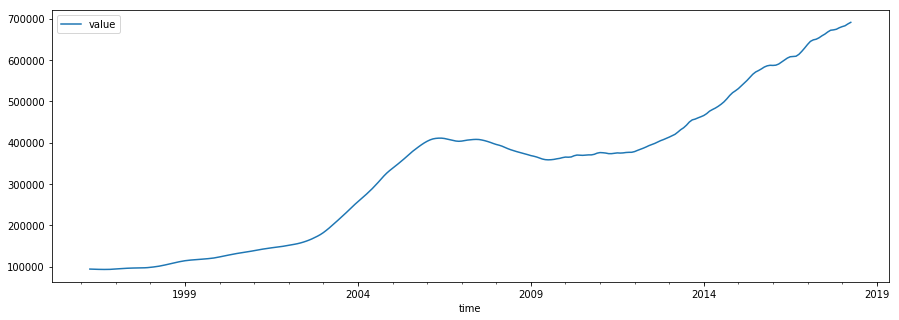

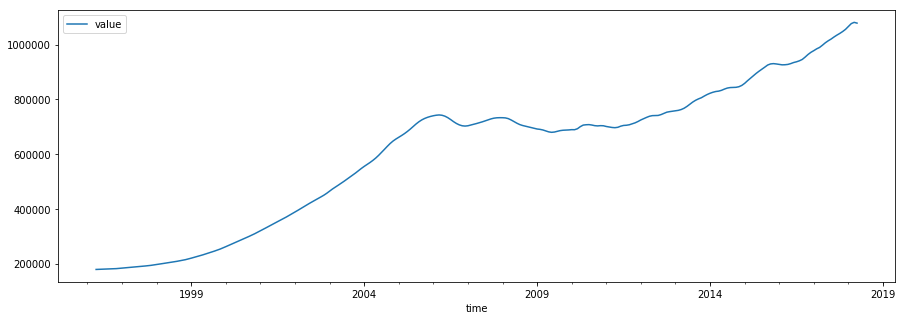

In [17]:
import matplotlib.pyplot as plt

# NOTE: if your visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

zip_dict[20002].plot(figsize = (15,5), subplots=False, legend=True)
zip_dict[20009].plot(figsize = (15,5), subplots=False, legend=True)
plt.show()

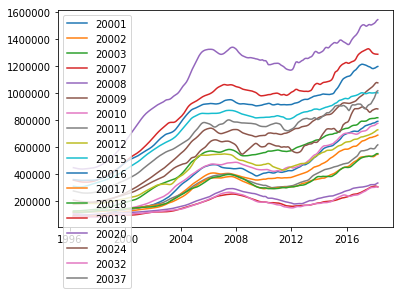

In [18]:
#plotting all DC zip codes

plt.plot(zip_dict[20001], label='20001')
plt.plot(zip_dict[20002], label='20002')
plt.plot(zip_dict[20003], label='20003')
plt.plot(zip_dict[20007], label='20007')
plt.plot(zip_dict[20008], label='20008')
plt.plot(zip_dict[20009], label='20009')
plt.plot(zip_dict[20010], label='20010')
plt.plot(zip_dict[20011], label='20011')
plt.plot(zip_dict[20012], label='20012')
plt.plot(zip_dict[20015], label='20015')
plt.plot(zip_dict[20016], label='20016')
plt.plot(zip_dict[20017], label='20017')
plt.plot(zip_dict[20018], label='20018')
plt.plot(zip_dict[20019], label='20019')
plt.plot(zip_dict[20020], label='20020')
plt.plot(zip_dict[20024], label='20024')
plt.plot(zip_dict[20032], label='20032')
plt.plot(zip_dict[20037], label='20037')
plt.legend(loc='upper left')
plt.show()

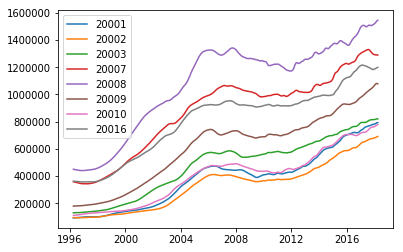

In [46]:
# based on a visual analysis of all the zip codes, the following 8 look to be very promising

plt.plot(zip_dict[20001], label='20001')
plt.plot(zip_dict[20002], label='20002')
plt.plot(zip_dict[20003], label='20003')
plt.plot(zip_dict[20007], label='20007')
plt.plot(zip_dict[20008], label='20008')
plt.plot(zip_dict[20009], label='20009')
plt.plot(zip_dict[20010], label='20010')
plt.plot(zip_dict[20016], label='20016')
plt.legend(loc='upper left')
plt.show()

I consider these zip codes to be promising based on two main factors:

1. Growth - they display growth and appear to be continuing on an upward trajectory
2. Low Volatility - they seem to be more stabel and less impacted by the 2008 recession compared to others

### Creating Scaled Variables to Visualize % Return to Compare how much the price in each zip code has changed since 1996

Now that I have selected some zip codes that appear to be promising based on price, I wanted to view the zip codes based on % return so that I can compare how much the price in each zip code has changed since 1996. Scaling the zip codes in this way sets the price in 1996 as the baseline and allows us to visualize how much the price increases or decreases from that baseline with each passing year.

In [35]:
#scaling all zip codes to visualize how much the price has increased since 1996
#scaled: (current - first) / first = % rtn

zip_dict["20001_scaled"]=(zip_dict[20001]-zip_dict[20001].iloc[0,0])/zip_dict[20001].iloc[0,0]
zip_dict["20002_scaled"]=(zip_dict[20002]-zip_dict[20002].iloc[0,0])/zip_dict[20002].iloc[0,0]
zip_dict["20003_scaled"]=(zip_dict[20003]-zip_dict[20003].iloc[0,0])/zip_dict[20003].iloc[0,0]
zip_dict["20007_scaled"]=(zip_dict[20007]-zip_dict[20007].iloc[0,0])/zip_dict[20007].iloc[0,0]
zip_dict["20008_scaled"]=(zip_dict[20008]-zip_dict[20008].iloc[0,0])/zip_dict[20008].iloc[0,0]
zip_dict["20009_scaled"]=(zip_dict[20009]-zip_dict[20009].iloc[0,0])/zip_dict[20009].iloc[0,0]
zip_dict["20010_scaled"]=(zip_dict[20010]-zip_dict[20010].iloc[0,0])/zip_dict[20010].iloc[0,0]
zip_dict["20011_scaled"]=(zip_dict[20011]-zip_dict[20011].iloc[0,0])/zip_dict[20011].iloc[0,0]
zip_dict["20012_scaled"]=(zip_dict[20012]-zip_dict[20012].iloc[0,0])/zip_dict[20012].iloc[0,0]
zip_dict["20015_scaled"]=(zip_dict[20015]-zip_dict[20015].iloc[0,0])/zip_dict[20015].iloc[0,0]
zip_dict["20016_scaled"]=(zip_dict[20016]-zip_dict[20016].iloc[0,0])/zip_dict[20016].iloc[0,0]
zip_dict["20017_scaled"]=(zip_dict[20017]-zip_dict[20017].iloc[0,0])/zip_dict[20017].iloc[0,0]
zip_dict["20018_scaled"]=(zip_dict[20018]-zip_dict[20018].iloc[0,0])/zip_dict[20018].iloc[0,0]
zip_dict["20019_scaled"]=(zip_dict[20019]-zip_dict[20019].iloc[0,0])/zip_dict[20019].iloc[0,0]
zip_dict["20020_scaled"]=(zip_dict[20020]-zip_dict[20020].iloc[0,0])/zip_dict[20020].iloc[0,0]
zip_dict["20024_scaled"]=(zip_dict[20024]-zip_dict[20024].iloc[0,0])/zip_dict[20024].iloc[0,0]
zip_dict["20032_scaled"]=(zip_dict[20032]-zip_dict[20032].iloc[0,0])/zip_dict[20032].iloc[0,0]
zip_dict["20037_scaled"]=(zip_dict[20037]-zip_dict[20037].iloc[0,0])/zip_dict[20037].iloc[0,0]

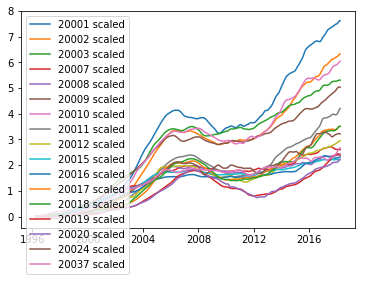

In [36]:
#visualizing all the scaled variables to understand which have gained the most value

plt.plot(zip_dict["20001_scaled"], label='20001 scaled')
plt.plot(zip_dict["20002_scaled"], label='20002 scaled')
plt.plot(zip_dict["20003_scaled"], label='20003 scaled')
plt.plot(zip_dict["20007_scaled"], label='20007 scaled')
plt.plot(zip_dict["20008_scaled"], label='20008 scaled')
plt.plot(zip_dict["20009_scaled"], label='20009 scaled')
plt.plot(zip_dict["20010_scaled"], label='20010 scaled')
plt.plot(zip_dict["20011_scaled"], label='20011 scaled')
plt.plot(zip_dict["20012_scaled"], label='20012 scaled')
plt.plot(zip_dict["20015_scaled"], label='20015 scaled')
plt.plot(zip_dict["20016_scaled"], label='20016 scaled')
plt.plot(zip_dict["20017_scaled"], label='20017 scaled')
plt.plot(zip_dict["20018_scaled"], label='20018 scaled')
plt.plot(zip_dict["20019_scaled"], label='20019 scaled')
plt.plot(zip_dict["20020_scaled"], label='20020 scaled')
plt.plot(zip_dict["20024_scaled"], label='20024 scaled')
plt.plot(zip_dict["20037_scaled"], label='20037 scaled')
plt.legend(loc='upper left')
plt.show()

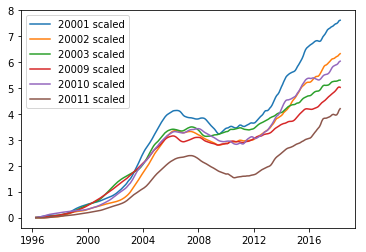

In [43]:
#The following zip codes have gained the most value since 1996:
plt.plot(zip_dict["20001_scaled"], label='20001 scaled')
plt.plot(zip_dict["20002_scaled"], label='20002 scaled')
plt.plot(zip_dict["20003_scaled"], label='20003 scaled')
plt.plot(zip_dict["20009_scaled"], label='20009 scaled')
plt.plot(zip_dict["20010_scaled"], label='20010 scaled')
plt.plot(zip_dict["20011_scaled"], label='20011 scaled')
plt.legend(loc='upper left')
plt.show()


Comparing the top zip our two visual analyisis:
    
    - Based on raw price value: 
        1. 20008
        2. 20007
        3. 20016
        4. 20009
        5. 20003
        6. 20001
        7. 20010
        8. 20002
        
    - Based on percent return
        1. 20001
        2. 20002
        3. 20010
        4. 20003
        5. 20009
        6. 20011
        
    - Overlap between the two:
        1. 20001
        2. 20002
        3. 20010
        4. 20003
        5. 20009

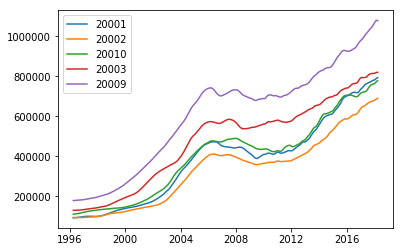

In [47]:
#Plotting our top 5 zip codes together

plt.plot(zip_dict[20001], label='20001')
plt.plot(zip_dict[20002], label='20002')
plt.plot(zip_dict[20010], label='20010')
plt.plot(zip_dict[20003], label='20003')
plt.plot(zip_dict[20009], label='20009')
plt.legend(loc='upper left')
plt.show()

- Most Valuable Currently: 20009
- Gained Most Value Since 1996: 20001, 20002
- Most Stable (Least Impacted by 2008 recession & generally stable): 20003, 20002
- Most Affordable Currently: 20002

*Analyzing the zip codes based on the above factors, I find that **20002** is the most promising zip code as it has gained the second most value since 1996, has generally been less volatile and is currently the most affordable.*

*Second best zip code appears to be **20003***, although the present average price is higher, and the last year of data suggests that price increase could be slowing down

***20001** and **20010** have seen impressive growth, and currently are lower priced on average compared to 20003, however they also have experienced some volatility over the years

Most linear time series forecasting methods assume normal distribution of observations. Check with .hist() or .plot(kind='kde')

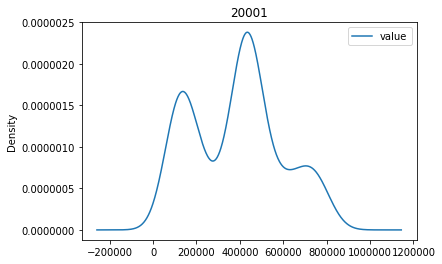

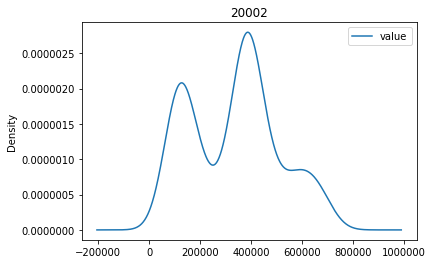

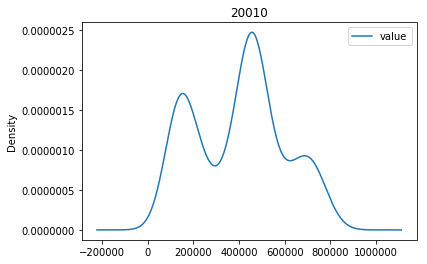

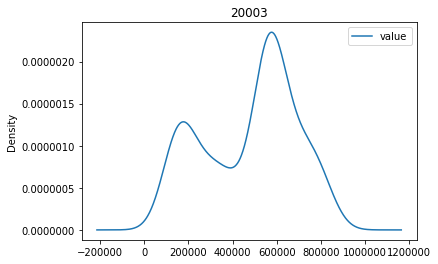

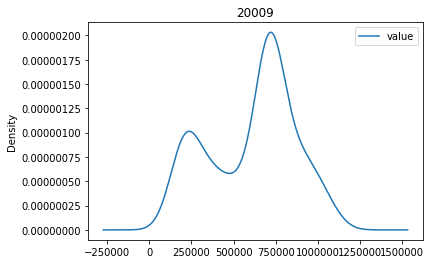

In [52]:
zip_dict[20001].plot(kind= 'kde', title='20001')
zip_dict[20002].plot(kind='kde', title='20002')
zip_dict[20010].plot(kind= 'kde', title='20010')
zip_dict[20003].plot(kind= 'kde', title='20003')
zip_dict[20009].plot(kind= 'kde', title='20009')

These aren't normally distributed, which may impact the results of the model and its ability to forcast accurately

## Step 4: Prepare Dataframes of 5 Selected Zipcodes to Model

In [58]:
zip20001 = zip_data.loc[zip_data['RegionName'] == 20001]
zip20002 = zip_data.loc[zip_data['RegionName'] == 20002]
zip20010 = zip_data.loc[zip_data['RegionName'] == 20010]
zip20003 = zip_data.loc[zip_data['RegionName'] == 20003]
zip20009 = zip_data.loc[zip_data['RegionName'] == 20009]

zip20001.head() #checking to see that it worked

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
258,66125,20001,Washington,DC,Washington,District of Columbia,259,92000.0,92600.0,93200.0,...,765000,768800,771200,773300,777600,780500,781600,785500,791400,793300


In [59]:
zip20002.head() #double checking

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
29,66126,20002,Washington,DC,Washington,District of Columbia,30,94300.0,94000.0,93700.0,...,662800,668000,672200,673100,674600,678200,680900,683000,687500,691300


In [60]:
#reshaping from wide to long format using melt_data method defined above

melted20001 = melt_data(zip20001)
melted20002 = melt_data(zip20002)
melted20010 = melt_data(zip20010)
melted20003 = melt_data(zip20003)
melted20009 = melt_data(zip20009)

melted20001.head() #checking to see that it worked

,value
time,
1996-04-01,92000.0
1996-05-01,92600.0
1996-06-01,93200.0
1996-07-01,93900.0
1996-08-01,94600.0


In [61]:
melted20009.head() #double checking

,value
time,
1996-04-01,178800.0
1996-05-01,179200.0
1996-06-01,179600.0
1996-07-01,180000.0
1996-08-01,180300.0


In [63]:
#checking to make sure there are no missing values
print(melted20001.isna().sum())
print(melted20002.isna().sum())
print(melted20010.isna().sum())
print(melted20003.isna().sum())
print(melted20009.isna().sum())

value    0
dtype: int64
value    0
dtype: int64
value    0
dtype: int64
value    0
dtype: int64
value    0
dtype: int64


# ARIMA Modeling

## Zipcode = 20001

### Parameter Selection for ARIMA Time Series Model Using AIC (Akaike information Criterion)

The first step towards fitting an ARIMA model is to find the values of `ARIMA(p,d,q)(P,D,Q)s` that produce the desired output. Selection of these parameters requires domain expertise and time.  I first generated small ranges of these parameters and used a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, I fit a new seasonal ARIMA model with the `SARIMAX()` function from the statsmodels module and assess its overall quality. 

`SARIMAX` detailed documentation can be viewed [here](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

To find the combination of parameters to use:

1. Define p,q and d parameters to take any value from 0/1 using `range()` function. (Note: We can try larger values which can make our model computationally expensive to run, you can try this as an additional experiment)

2. Generate combinations for `(p,d,q)` using `itertools.product`.
3. Generate seasonal combinations as `(p,d,q)s`. Use s = 12 (constant)

In [65]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

For evaluating the model, I used the AIC (Akaike Information Criterion) value, which is provided by ARIMA models fitted using `statsmodels` library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. To achieve this, I performed the following:

1. Initialized an empty list to store results
2. Iterated through all the paramaters in pdq with parameters in seasonal pdq (nested loop) to create a grid
3. Run `SARIMAX` from statsmodels for each iteration. Details can be found [HERE](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html). Set `enforce_stationarity` and `enforce_invertibility` to False. 
4. Got the results in each iteration with `model.fit()` and store the AIC values. 
5. Found the lowest AIC and select parameters for further analysis. 

* An overview of Akaike Information Criterion can be viewed [HERE](http://www.statisticshowto.com/akaikes-information-criterion/)

In [66]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
         try:
             mod = sm.tsa.statespace.SARIMAX(melted20001,
                                             order=comb,
                                             seasonal_order=combs,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

             output = mod.fit()
             ans.append([comb, combs, output.aic])
             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
         except:
             continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7607.3094680875965
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =7109.73777056729
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6153.409075272848
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5873.529158829102
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =6040.0946863308545
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5966.084009863183
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5655.5583561289695
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5635.086083943744
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =7387.051587441354
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =7362.489921991718
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5954.440077969369
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =8161.497568330564
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =7044.541238177362
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6990.752551082477
ARIMA (0, 0, 1) x 

In [68]:
 # Find the parameters with minimal AIC value.
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           4093.14
Name: 63, dtype: object

In [71]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4175.947034
62,"(1, 1, 1)","(1, 1, 0, 12)",4169.857801
63,"(1, 1, 1)","(1, 1, 1, 12)",4093.135998


### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

Using grid search, I identified the set of parameters that produces the best fitting model to my time series data. I next continued to examine this particular model in more depth.

I started by plugging the optimal parameter values into a new SARIMAX model. This time only fitting the model with data up to 2016 so that I can test the model's ability to make predictions by comparing it to the data we have for 2016 to 2018.

In [103]:
# plug the optimal parameter values into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20001_1 = sm.tsa.statespace.SARIMAX(melted20001[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20001_1 = ARIMA_MODEL20001_1.fit()

print(output20001_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8787      0.029     29.974      0.000       0.821       0.936
ma.L1          0.7006      0.039     17.984      0.000       0.624       0.777
ar.S.L12       0.1611      0.058      2.765      0.006       0.047       0.275
ma.S.L12      -0.6983      0.044    -15.978      0.000      -0.784      -0.613
sigma2      1.153e+06   7.78e+04     14.823      0.000       1e+06    1.31e+06


Check p-values on coefficients

* all of the p-values are < 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

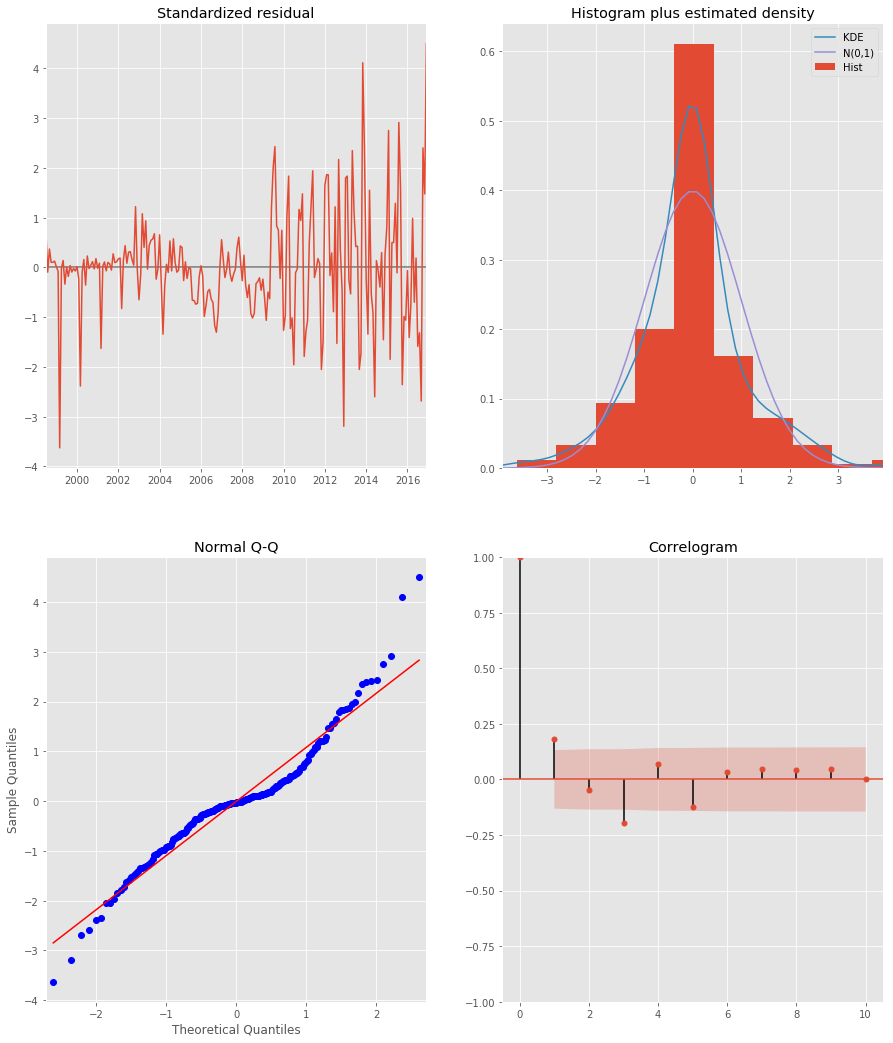

In [104]:
output20001_1.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [105]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20001_1 = output20001_1.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20001_1 = pred20001_1.conf_int()

In [106]:
pred_conf20001_1

,lower value,upper value
2016-01-01,699861.672801,704071.296661
2016-02-01,704907.194237,709116.818097
2016-03-01,706610.994699,710820.618553
2016-04-01,707635.449198,711845.073026
2016-05-01,712949.278334,717158.902098
2016-06-01,715593.588008,719803.211564
2016-07-01,719601.037841,723810.661335
2016-08-01,720106.883876,724316.507339
2016-09-01,720180.217448,724389.840898
2016-10-01,713515.234790,717724.858233


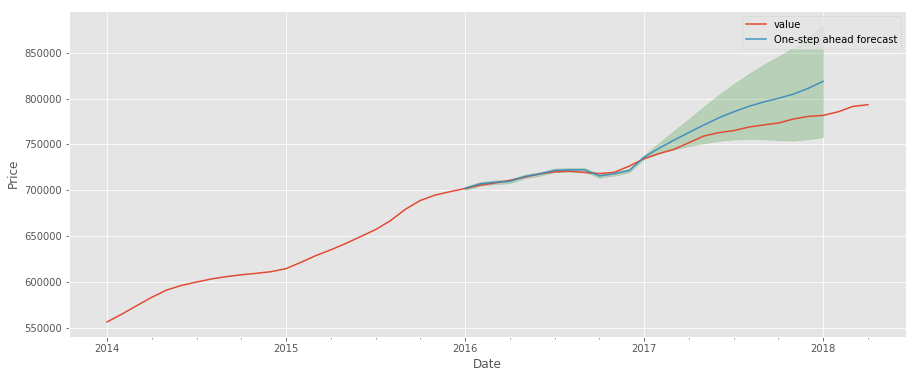

In [107]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20001['2014':].plot(label = 'Observed')

#Plot predicted values
pred20001_1.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20001_1.index,
                pred_conf20001_1.iloc[:, 0],
                pred_conf20001_1.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

The forecasts aligns with the true values from 2016 to 2017, with a tight confidence interval. However, we see the forecast diverging from the true values during 2017 and the confidence interval increases greatly. The forecast predicted a larger increase in price than was actually observed in reality.


I also checked for the accuracy of the forecasts using MSE (Mean Squared Error). This provides with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.


In [108]:
# Get the Real and predicted values
Price_forecasted20001_1 = pred20001_1.predicted_mean
Price_truth20001_1 = melted20001['2016-01-01':]

# Compute the mean square error
mse20001_1 = ((Price_forecasted20001_1 - Price_truth20001_1.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20001_1, 2)))

The Mean Squared Error of our forecasts is 241567280.42


The MSE is very large. Suggesting that this model is unlikely to yeild accurate predictions.

Given the results, I decided to try the parameters that produced second and third smallest AIC values to see if I could reduce the MSE.

### Repeat Steps Above Using Parameters Producing Second Smallest AIC Value

In [71]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4175.947034
62,"(1, 1, 1)","(1, 1, 0, 12)",4169.857801
63,"(1, 1, 1)","(1, 1, 1, 12)",4093.135998


#### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

In [109]:
# plug in the parameter values leading to second lowest AIC value into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20001_2 = sm.tsa.statespace.SARIMAX(melted20001[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 1, 0, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20001_2 = ARIMA_MODEL20001_2.fit()

print(output20001_2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8402      0.032     26.235      0.000       0.777       0.903
ma.L1          0.6971      0.043     16.157      0.000       0.613       0.782
ar.S.L12      -0.1085      0.021     -5.108      0.000      -0.150      -0.067
sigma2      1.765e+06   1.19e+05     14.882      0.000    1.53e+06       2e+06


Check p-values on coefficients

* all of the p-values are < 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

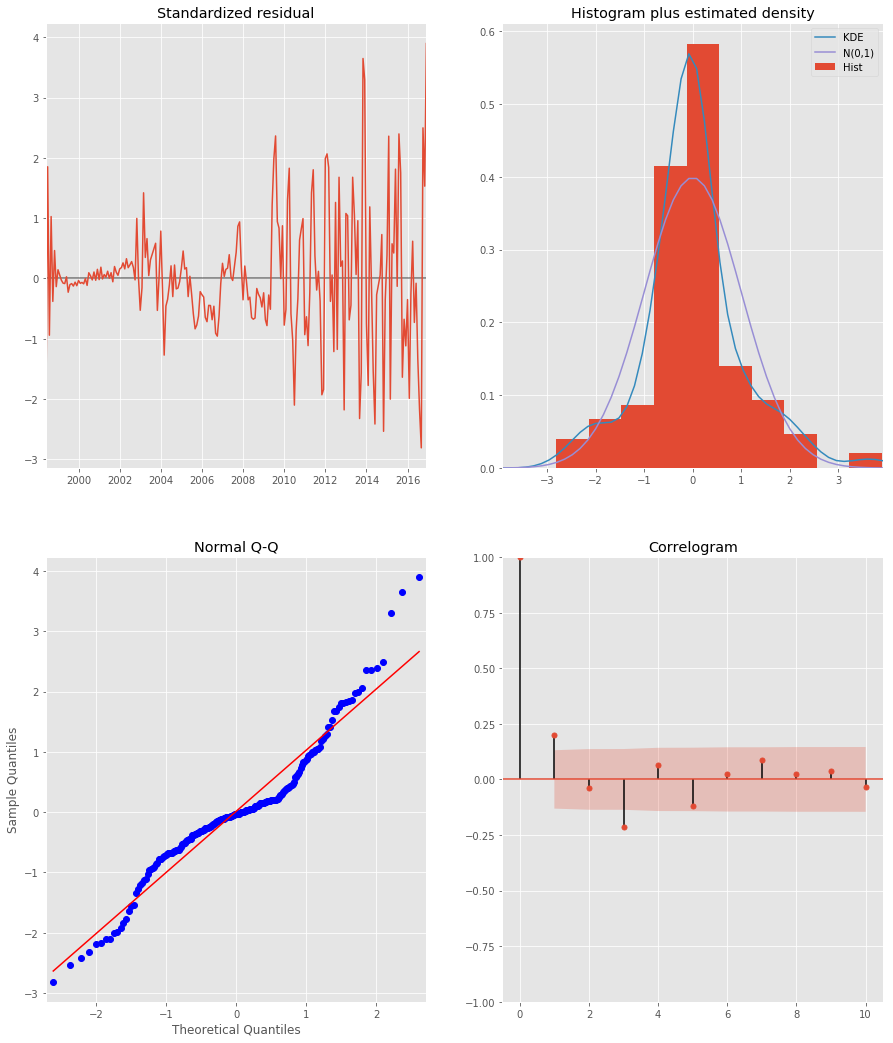

In [110]:
output20001_2.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

#### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [111]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20001_2 = output20001_2.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20001_2 = pred20001_2.conf_int()

In [112]:
pred_conf20001_2

,lower value,upper value
2016-01-01,699761.989617,704969.285165
2016-02-01,705538.588546,710745.884094
2016-03-01,705633.071481,710840.367030
2016-04-01,707375.436558,712582.732107
2016-05-01,712665.342654,717872.638203
2016-06-01,715401.915804,720609.211352
2016-07-01,719166.871907,724374.167455
2016-08-01,721086.360962,726293.656511
2016-09-01,720529.523677,725736.819226
2016-10-01,712277.564946,717484.860494


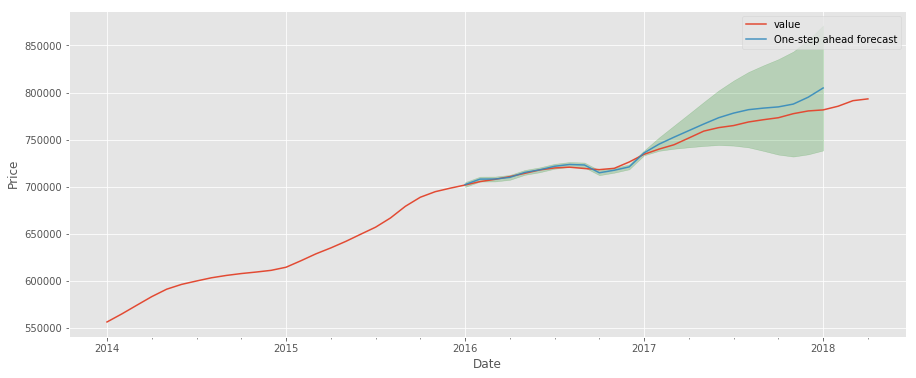

In [113]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20001['2014':].plot(label = 'Observed')

#Plot predicted values
pred20001_2.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20001_2.index,
                pred_conf20001_2.iloc[:, 0],
                pred_conf20001_2.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

As with the first model using the parameters associated with the lowest AIC value,  forecasts aligns with the true values from 2016 to 2017, with a tight confidence interval. The forecast still diverges from the true values during 2017 and the confidence interval increases greatly, but the forcast is closer to the true values on this model than on the original. This forecast still predicted a larger increase in price than was actually observed in reality.

Next, checking MSE


In [115]:
# Get the Real and predicted values
Price_forecasted20001_2 = pred20001_2.predicted_mean
Price_truth20001_2 = melted20001['2016-01-01':]

# Compute the mean square error
mse20001_2 = ((Price_forecasted20001_2 - Price_truth20001_2.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20001_2, 2)))

The Mean Squared Error of our forecasts is 75507830.57


The MSE is still very large, but it is less than the original model. 241,567,280.42 > 75,507,830.57

In [116]:
print(mse20001_1)
print(mse20001_2)

241567280.41841742
75507830.56935608


### Repeat Steps Above Using Parameters Producing Third Smallest AIC Value

In [71]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4175.947034
62,"(1, 1, 1)","(1, 1, 0, 12)",4169.857801
63,"(1, 1, 1)","(1, 1, 1, 12)",4093.135998


#### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

In [117]:
# plug in the parameter values leading to second lowest AIC value into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20001_3 = sm.tsa.statespace.SARIMAX(melted20001[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 0, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20001_3 = ARIMA_MODEL20001_3.fit()

print(output20001_3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9652      0.016     58.666      0.000       0.933       0.997
ma.L1          0.6692      0.036     18.512      0.000       0.598       0.740
ar.S.L12      -0.0466      0.166     -0.281      0.779      -0.372       0.279
ma.S.L12      -0.1915      0.163     -1.175      0.240      -0.511       0.128
sigma2      7.995e+05   4.42e+04     18.080      0.000    7.13e+05    8.86e+05


Check p-values on coefficients

* all of the p-values are NOT < 0.05, ar.S.L12 and ma.S.L12 are > 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

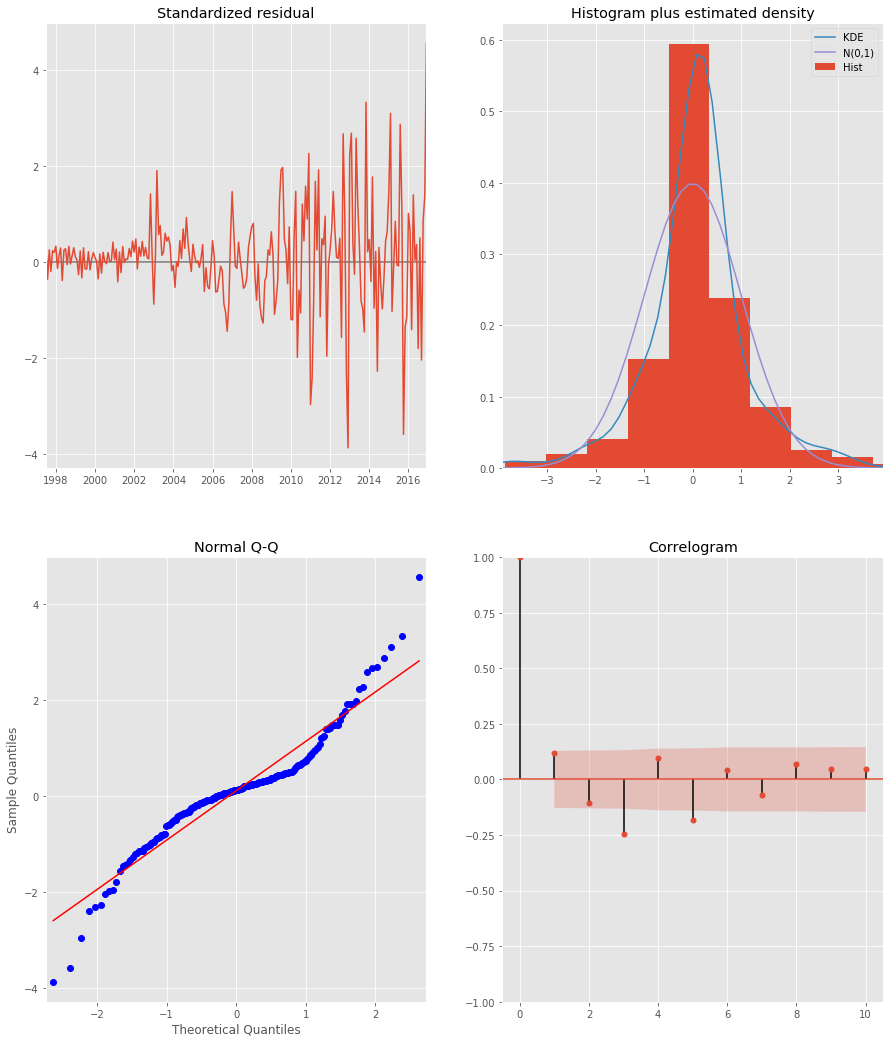

In [118]:
output20001_3.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

#### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [119]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20001_3 = output20001_3.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20001_3 = pred20001_3.conf_int()

In [120]:
pred_conf20001_3

,lower value,upper value
2016-01-01,699237.088544,702742.086306
2016-02-01,703165.341664,706670.339426
2016-03-01,707402.027278,710907.025040
2016-04-01,707792.559240,711297.557002
2016-05-01,712512.966288,716017.964050
2016-06-01,715817.169769,719322.167530
2016-07-01,719855.716050,723360.713812
2016-08-01,718596.115515,722101.113277
2016-09-01,719469.537467,722974.535229
2016-10-01,715677.088641,719182.086403


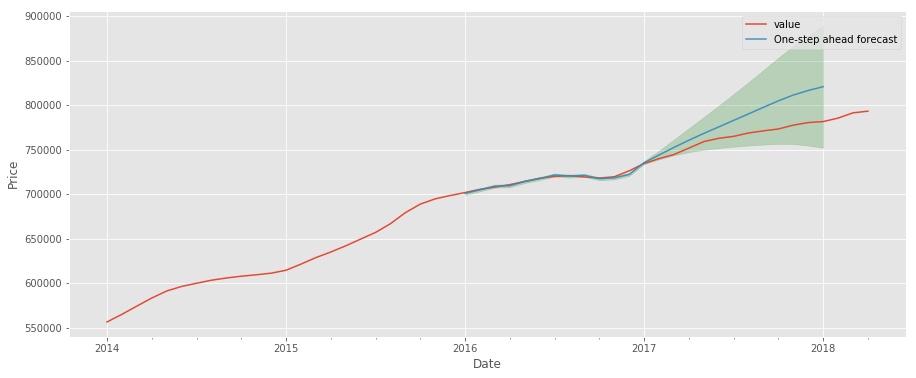

In [121]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20001['2014':].plot(label = 'Observed')

#Plot predicted values
pred20001_3.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20001_3.index,
                pred_conf20001_3.iloc[:, 0],
                pred_conf20001_3.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [122]:
# Get the Real and predicted values
Price_forecasted20001_3 = pred20001_3.predicted_mean
Price_truth20001_3 = melted20001['2016-01-01':]

# Compute the mean square error
mse20001_3 = ((Price_forecasted20001_3 - Price_truth20001_3.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20001_3, 2)))

The Mean Squared Error of our forecasts is 275861580.72


This model produced the largest MSE of the three, and some of the p-values were greater than 0.05. The model using the parameters producing the second smallest AIC value is the best.

In [123]:
print(mse20001_1)
print(mse20001_2)
print(mse20001_3)

241567280.41841742
75507830.56935608
275861580.7202825


### Dynamic Forecasting with Best Model

Used to gain deeper insight into the model's predictive power. Uses information from the time series up to a certain point, after that forecasts are generated using values from prvious forecasted time points

In [55]:
melted20001.head()

,value
time,
1996-04-01,92000.0
1996-05-01,92600.0
1996-06-01,93200.0
1996-07-01,93900.0
1996-08-01,94600.0


In [128]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic20001_2 = output20001_2.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True, end=pd.to_datetime('2019-01-01'))
pred_dynamic_conf20001_2 = pred_dynamic20001_2.conf_int()

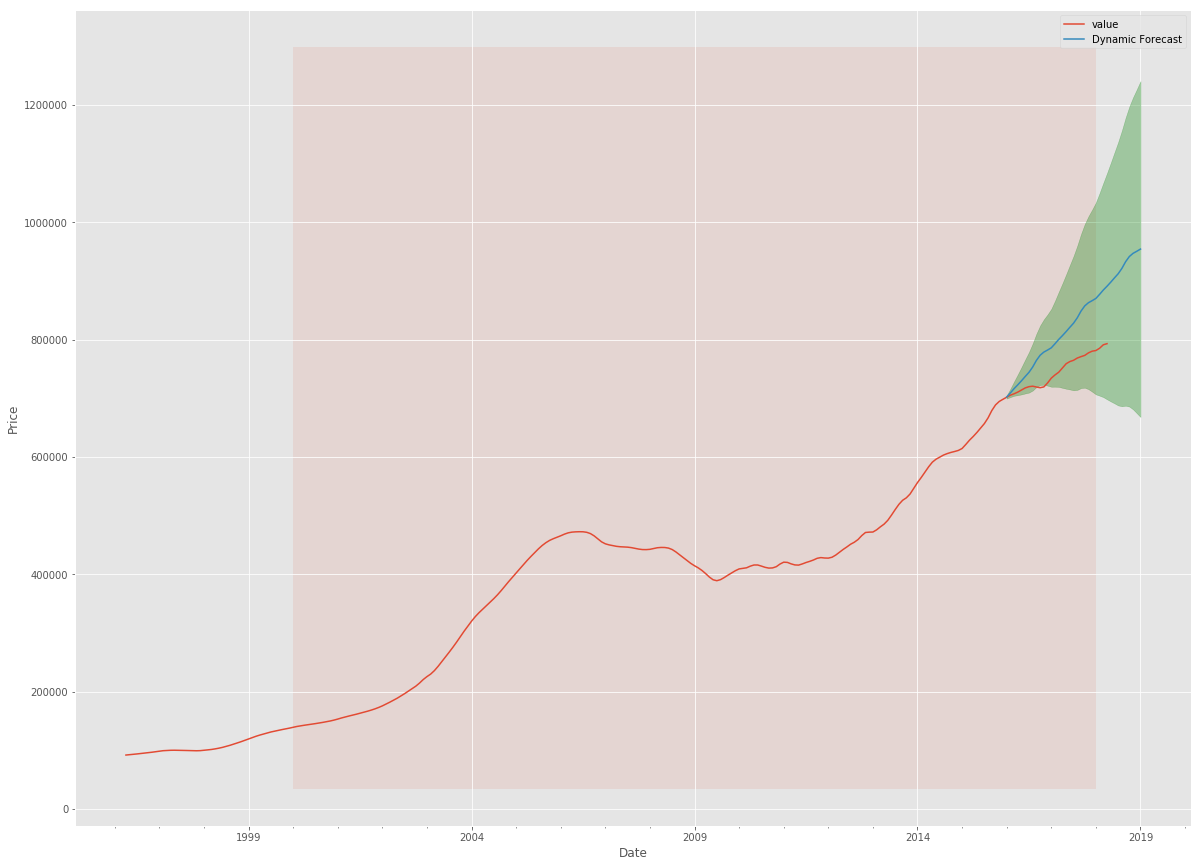

In [129]:
# Plot the dynamic forecast with confidence intervals.

ax = melted20001.plot(label='observed', figsize=(20, 15))
pred_dynamic20001_2.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf20001_2.index,
                pred_dynamic_conf20001_2.iloc[:, 0],
                pred_dynamic_conf20001_2.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), Price_forecasted20001_2.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [130]:
# Extract the predicted and true values of our time series
Dynamic_Price_forecasted20001_2 = pred_dynamic20001_2.predicted_mean
Price_truth = melted20001['2016-01-01':]

# Compute the mean square error
mseDynmaic20001_2 = ((Dynamic_Price_forecasted20001_2 - Price_truth) ** 2).mean()
print('The Mean Squared Error of our dynamic forecasts is {}'.format(round(mseDynmaic20001_2, 2)))

The Mean Squared Error of our dynamic forecasts is 2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00

In [134]:
# Get forecast 10 steps ahead in future
dynamicprediction20001_2 = output20001_2.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_conf20001_2 = dynamicprediction20001_2.conf_int()

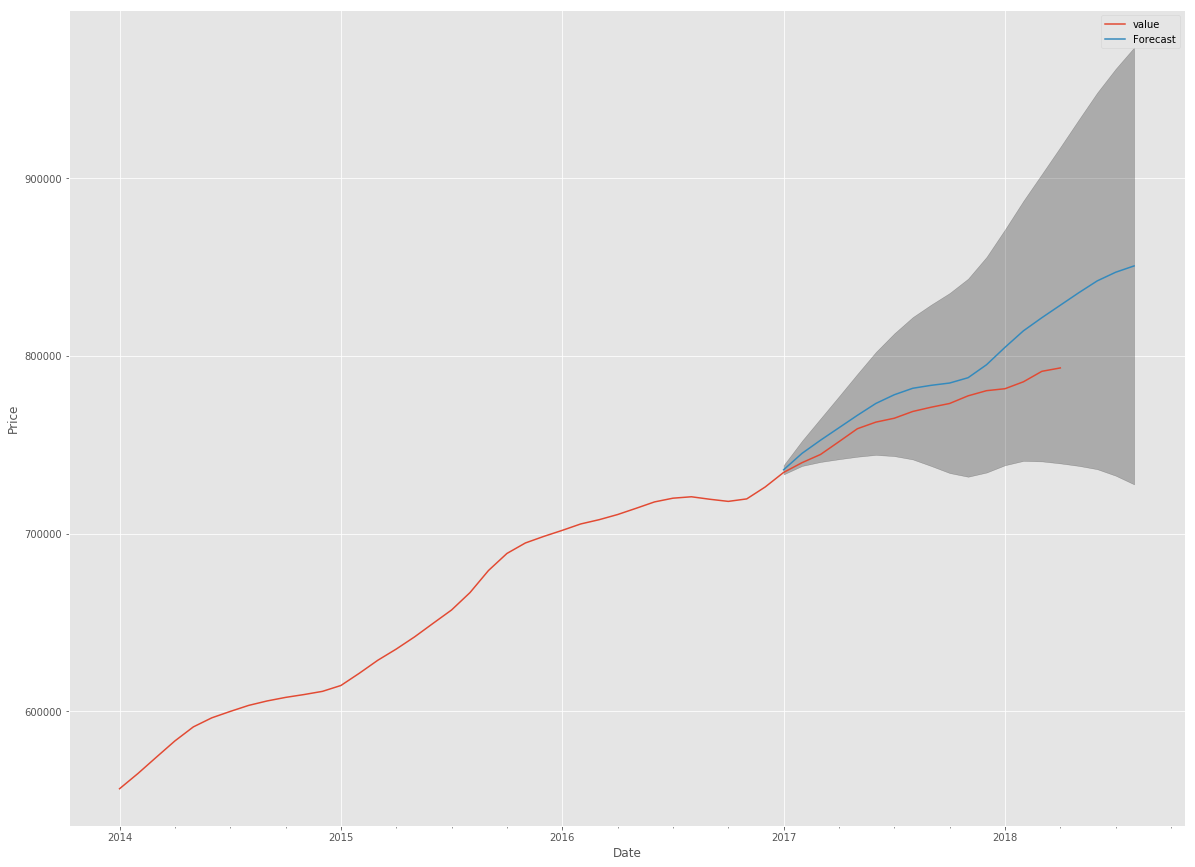

In [135]:
# Plot future predictions with confidence intervals

ax = melted20001['2014':].plot(label='observed', figsize=(20, 15))
dynamicprediction20001_2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf20001_2.index,
                pred_conf20001_2.iloc[:, 0],
                pred_conf20001_2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

## Zipcode = 20002

In [136]:
# # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
         try:
             mod = sm.tsa.statespace.SARIMAX(melted20002,
                                             order=comb,
                                             seasonal_order=combs,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

             output = mod.fit()
             ans.append([comb, combs, output.aic])
             print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
         except:
             continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7531.1335326957915
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =7036.739136934168
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =6066.323606751242
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5790.506213169497
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5938.391499805374
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5854.791186836779
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5512.518265837505
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =7400.118682405668
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =7311.4913999805485
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6935.329483709436
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =6064.115002783867
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =8031.612156726984
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6971.637710122979
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6918.4015836352355
ARIMA (0, 0, 1) x

In [137]:
 # Find the parameters with minimal AIC value.
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           3981.76
Name: 63, dtype: object

In [138]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4049.674195
62,"(1, 1, 1)","(1, 1, 0, 12)",4061.924783
63,"(1, 1, 1)","(1, 1, 1, 12)",3981.758228


### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

Using grid search, I identified the set of parameters that produces the best fitting model to my time series data. I next continued to examine this particular model in more depth.

I started by plugging the optimal parameter values into a new SARIMAX model. This time only fitting the model with data up to 2016 so that I can test the model's ability to make predictions by comparing it to the data we have for 2016 to 2018.

In [140]:
# plug the optimal parameter values into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20002_1 = sm.tsa.statespace.SARIMAX(melted20002[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20002_1 = ARIMA_MODEL20002_1.fit()

print(output20002_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9074      0.028     32.152      0.000       0.852       0.963
ma.L1          0.5241      0.039     13.328      0.000       0.447       0.601
ar.S.L12       0.1766      0.061      2.912      0.004       0.058       0.295
ma.S.L12      -0.8080      0.065    -12.521      0.000      -0.934      -0.682
sigma2      6.299e+05    4.4e+04     14.304      0.000    5.44e+05    7.16e+05


Check p-values on coefficients

* all of the p-values are < 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

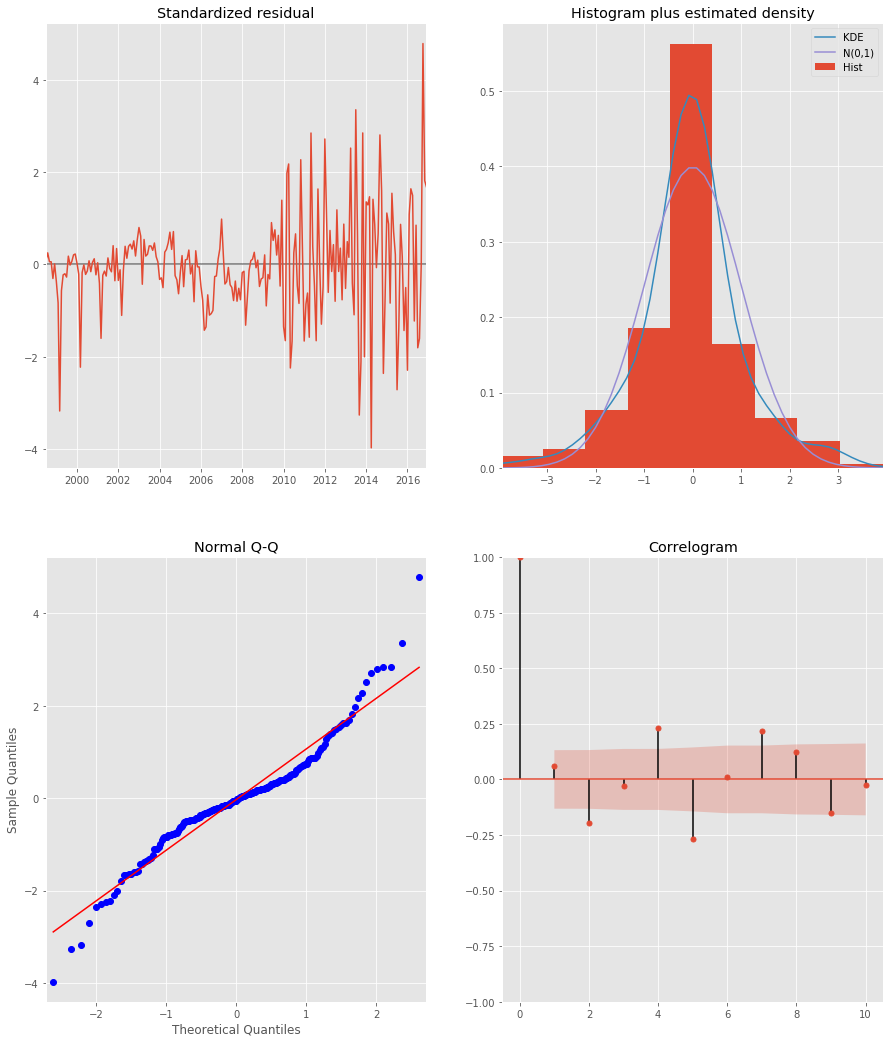

In [141]:
output20002_1.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [142]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20002_1 = output20002_1.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20002_1 = pred20002_1.conf_int()

In [143]:
pred_conf20002_1

,lower value,upper value
2016-01-01,587360.720726,590472.037226
2016-02-01,585284.764541,588396.081026
2016-03-01,587644.410760,590755.727012
2016-04-01,592557.818053,595669.133669
2016-05-01,599415.690277,602527.002003
2016-06-01,602669.427589,605780.705052
2016-07-01,607975.249108,611086.521331
2016-08-01,608514.697276,611625.967877
2016-09-01,607729.458681,610840.728928
2016-10-01,608549.517968,611660.788125


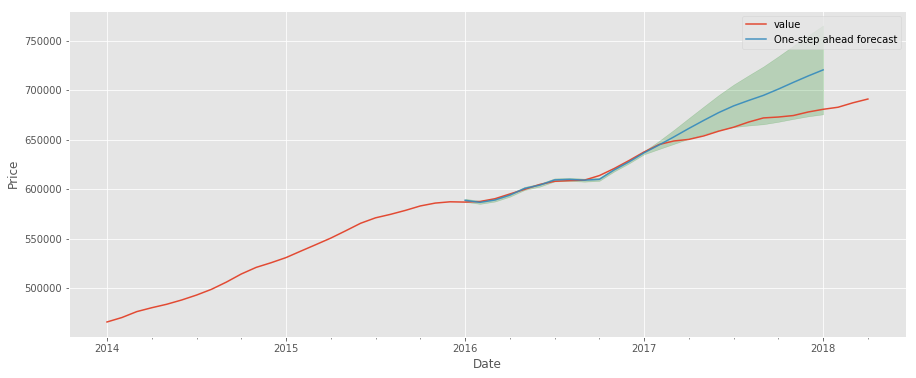

In [144]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20002['2014':].plot(label = 'Observed')

#Plot predicted values
pred20002_1.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20002_1.index,
                pred_conf20002_1.iloc[:, 0],
                pred_conf20002_1.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

The forecasts aligns with the true values from 2016 to 2017, with a tight confidence interval. However, we see the forecast diverging from the true values during 2017 and the confidence interval increases greatly. The forecast predicted a larger increase in price than was actually observed in reality.


I also checked for the accuracy of the forecasts using MSE (Mean Squared Error). This provides with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.


In [145]:
# Get the Real and predicted values
Price_forecasted20002_1 = pred20002_1.predicted_mean
Price_truth20002_1 = melted20002['2016-01-01':]

# Compute the mean square error
mse20002_1 = ((Price_forecasted20002_1 - Price_truth20002_1.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20002_1, 2)))

The Mean Squared Error of our forecasts is 282920659.91


The MSE is very large. Suggesting that this model is unlikely to yeild accurate predictions.

Given the results, I decided to try the parameters that produced second and third smallest AIC values to see if I could reduce the MSE.

### Repeat Steps Above Using Parameters Producing Second Smallest AIC Value

In [146]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4049.674195
62,"(1, 1, 1)","(1, 1, 0, 12)",4061.924783
63,"(1, 1, 1)","(1, 1, 1, 12)",3981.758228


#### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

In [147]:
# plug in the parameter values leading to second lowest AIC value into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20002_2 = sm.tsa.statespace.SARIMAX(melted20002[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 1, 0, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20002_2 = ARIMA_MODEL20002_2.fit()

print(output20002_2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8353      0.041     20.444      0.000       0.755       0.915
ma.L1          0.5238      0.053      9.910      0.000       0.420       0.627
ar.S.L12      -0.1313      0.024     -5.379      0.000      -0.179      -0.083
sigma2      1.086e+06   8.01e+04     13.561      0.000    9.29e+05    1.24e+06


Check p-values on coefficients

* all of the p-values are < 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

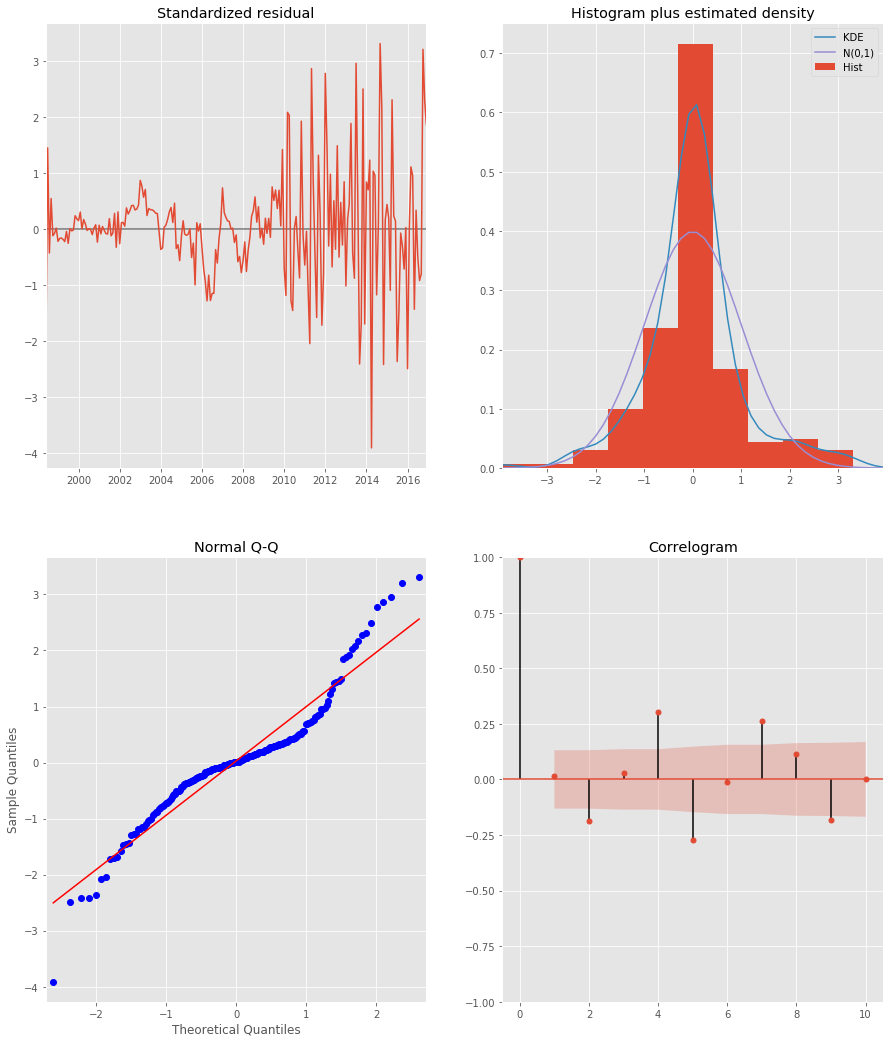

In [148]:
output20002_2.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

#### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [150]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20002_2 = output20002_2.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20002_2 = pred20002_2.conf_int()

In [151]:
pred_conf20002_2

,lower value,upper value
2016-01-01,587659.976813,591745.414743
2016-02-01,585665.309679,589750.747609
2016-03-01,587305.934954,591391.372884
2016-04-01,592270.218411,596355.656341
2016-05-01,599454.921867,603540.359797
2016-06-01,602511.892601,606597.330531
2016-07-01,606579.120742,610664.558672
2016-08-01,607719.482049,611804.919979
2016-09-01,608095.407222,612180.845153
2016-10-01,608518.556675,612603.994605


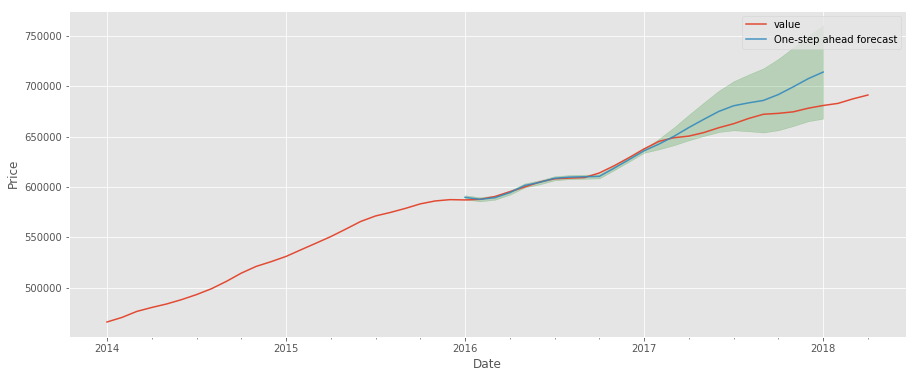

In [152]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20002['2014':].plot(label = 'Observed')

#Plot predicted values
pred20002_2.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20002_2.index,
                pred_conf20002_2.iloc[:, 0],
                pred_conf20002_2.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

As with the first model using the parameters associated with the lowest AIC value,  forecasts aligns with the true values from 2016 to 2017, with a tight confidence interval. The forecast still diverges from the true values during 2017 and the confidence interval increases greatly, but the forcast is closer to the true values on this model than on the original. This forecast still predicted a larger increase in price than was actually observed in reality.

Next, checking MSE


In [153]:
# Get the Real and predicted values
Price_forecasted20002_2 = pred20002_2.predicted_mean
Price_truth20002_2 = melted20002['2016-01-01':]

# Compute the mean square error
mse20002_2 = ((Price_forecasted20002_2 - Price_truth20002_2.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20002_2, 2)))

The Mean Squared Error of our forecasts is 169276590.24


The MSE is still very large, but it is less than the original model.

In [154]:
print(mse20002_1)
print(mse20002_2)

282920659.91369975
169276590.24423534


### (Left off here!) Repeat Steps Above Using Parameters Producing Third Smallest AIC Value

In [71]:
ans_df.tail(3) #the top 3

,pdq,pdqs,aic
61,"(1, 1, 1)","(1, 0, 1, 12)",4175.947034
62,"(1, 1, 1)","(1, 1, 0, 12)",4169.857801
63,"(1, 1, 1)","(1, 1, 1, 12)",4093.135998


#### Fitting ARIMA Time Series Model Using Parameters with Minimal AIC Value

In [117]:
# plug in the parameter values leading to second lowest AIC value into a new SARIMAX model.
# Fit the model and print results
ARIMA_MODEL20001_3 = sm.tsa.statespace.SARIMAX(melted20001[:'2016'],
                                 order=(1, 1, 1),
                                 seasonal_order=(1, 0, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
output20001_3 = ARIMA_MODEL20001_3.fit()

print(output20001_3.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9652      0.016     58.666      0.000       0.933       0.997
ma.L1          0.6692      0.036     18.512      0.000       0.598       0.740
ar.S.L12      -0.0466      0.166     -0.281      0.779      -0.372       0.279
ma.S.L12      -0.1915      0.163     -1.175      0.240      -0.511       0.128
sigma2      7.995e+05   4.42e+04     18.080      0.000    7.13e+05    8.86e+05


Check p-values on coefficients

* all of the p-values are NOT < 0.05, ar.S.L12 and ma.S.L12 are > 0.05

Then run model diagnostics to ensure that none of the assumptions made by the model have been violated:

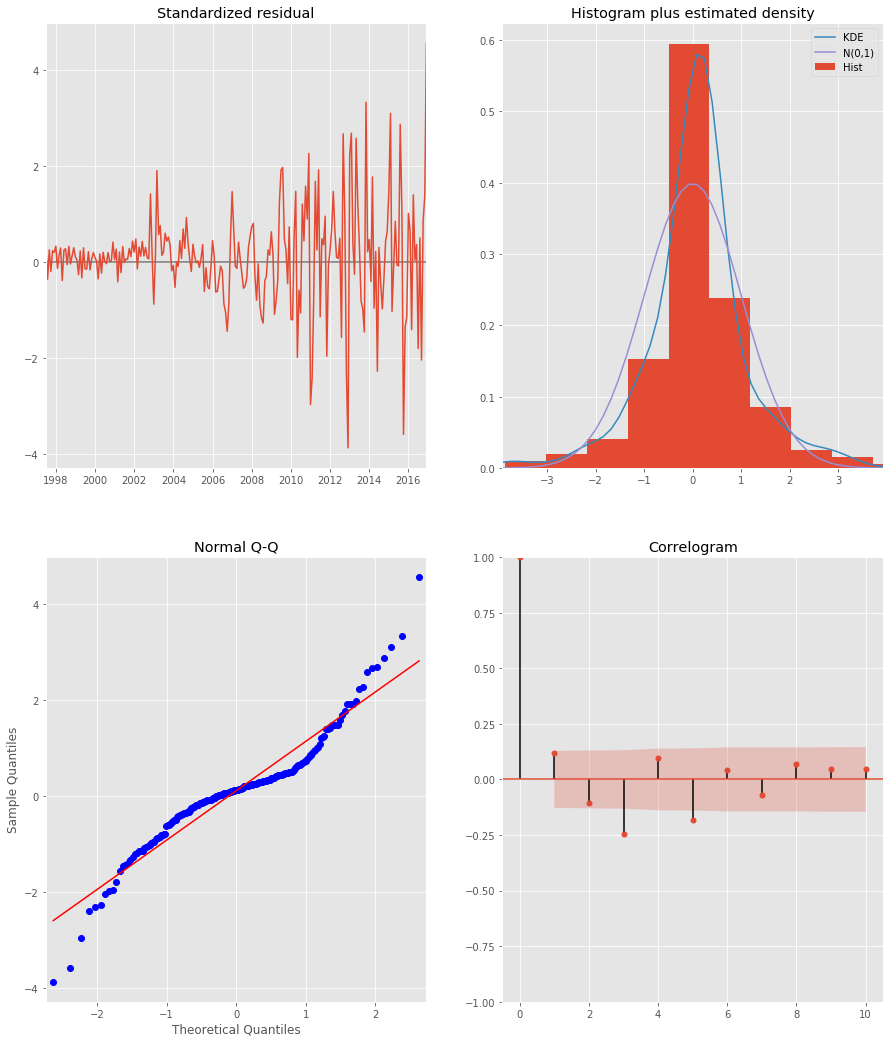

In [118]:
output20001_3.plot_diagnostics(figsize=(15, 18))
plt.show()


The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean.

Checking for these assumptions from diagnostics plots:

* In the top right plot, the red KDE line does not follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Residuals are not normally distributed?

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) don't fully follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Residuals are not normally distributed?

* The residuals over time (top left plot) don't really look like white noise - some kind of trend I didn't account for? 

* Autocorrelation (i.e. correlogram) plot on the bottom right, shows that the time series residuals have low correlation with lagged versions of itself?

#### Validating the Model

To validate the model I compared predicted values to real values of the time series

In [119]:
# Get predictions starting from 2016-01-01 (where the training left off) and calculate confidence intervals.

pred20001_3 = output20001_3.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False, end=pd.to_datetime('2018-01-01'))
pred_conf20001_3 = pred20001_3.conf_int()

In [120]:
pred_conf20001_3

,lower value,upper value
2016-01-01,699237.088544,702742.086306
2016-02-01,703165.341664,706670.339426
2016-03-01,707402.027278,710907.025040
2016-04-01,707792.559240,711297.557002
2016-05-01,712512.966288,716017.964050
2016-06-01,715817.169769,719322.167530
2016-07-01,719855.716050,723360.713812
2016-08-01,718596.115515,722101.113277
2016-09-01,719469.537467,722974.535229
2016-10-01,715677.088641,719182.086403


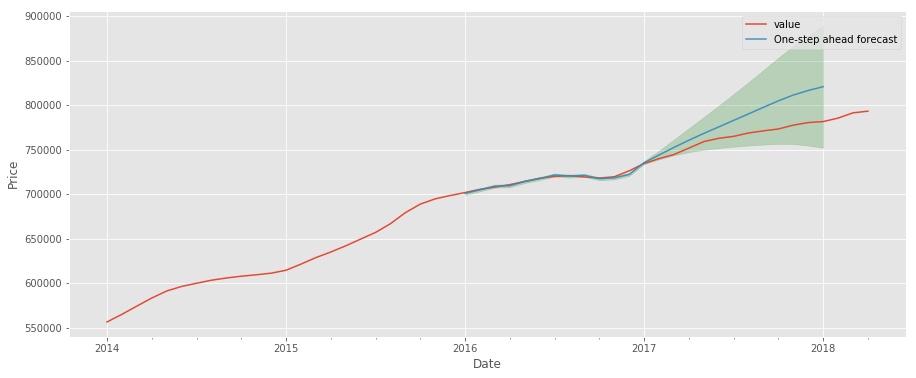

In [121]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

#Plot observed values
ax = melted20001['2014':].plot(label = 'Observed')

#Plot predicted values
pred20001_3.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.9)

#Plot the range for confidence intervals
ax.fill_between(pred_conf20001_3.index,
                pred_conf20001_3.iloc[:, 0],
                pred_conf20001_3.iloc[:, 1], color='g', alpha=.20)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [122]:
# Get the Real and predicted values
Price_forecasted20001_3 = pred20001_3.predicted_mean
Price_truth20001_3 = melted20001['2016-01-01':]

# Compute the mean square error
mse20001_3 = ((Price_forecasted20001_3 - Price_truth20001_3.value) ** 2).mean() #one was a series and one was a df
print('The Mean Squared Error of our forecasts is {}'.format(round(mse20001_3, 2)))

The Mean Squared Error of our forecasts is 275861580.72


This model produced the largest MSE of the three, and some of the p-values were greater than 0.05. The model using the parameters producing the second smallest AIC value is the best.

In [123]:
print(mse20001_1)
print(mse20001_2)
print(mse20001_3)

241567280.41841742
75507830.56935608
275861580.7202825


### Dynamic Forecasting with Best Model

Used to gain deeper insight into the model's predictive power. Uses information from the time series up to a certain point, after that forecasts are generated using values from prvious forecasted time points

In [55]:
melted20001.head()

,value
time,
1996-04-01,92000.0
1996-05-01,92600.0
1996-06-01,93200.0
1996-07-01,93900.0
1996-08-01,94600.0


In [128]:
# Get dynamic predictions with confidence intervals as above.
pred_dynamic20001_2 = output20001_2.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True, end=pd.to_datetime('2019-01-01'))
pred_dynamic_conf20001_2 = pred_dynamic20001_2.conf_int()

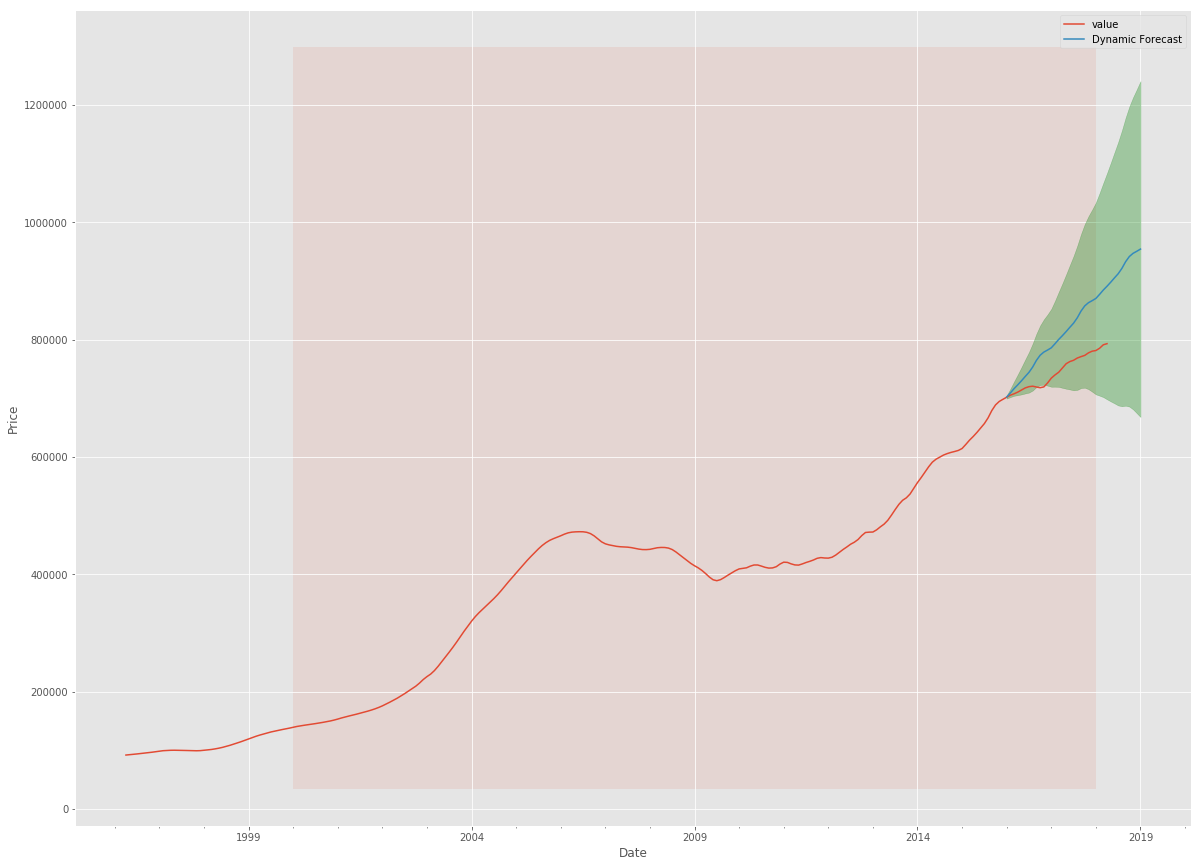

In [129]:
# Plot the dynamic forecast with confidence intervals.

ax = melted20001.plot(label='observed', figsize=(20, 15))
pred_dynamic20001_2.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf20001_2.index,
                pred_dynamic_conf20001_2.iloc[:, 0],
                pred_dynamic_conf20001_2.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), Price_forecasted20001_2.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [130]:
# Extract the predicted and true values of our time series
Dynamic_Price_forecasted20001_2 = pred_dynamic20001_2.predicted_mean
Price_truth = melted20001['2016-01-01':]

# Compute the mean square error
mseDynmaic20001_2 = ((Dynamic_Price_forecasted20001_2 - Price_truth) ** 2).mean()
print('The Mean Squared Error of our dynamic forecasts is {}'.format(round(mseDynmaic20001_2, 2)))

The Mean Squared Error of our dynamic forecasts is 2016-01-01 00:00:00   NaN
2016-02-01 00:00:00   NaN
2016-03-01 00:00:00   NaN
2016-04-01 00:00:00   NaN
2016-05-01 00:00:00   NaN
2016-06-01 00:00:00   NaN
2016-07-01 00:00:00   NaN
2016-08-01 00:00:00   NaN
2016-09-01 00:00:00   NaN
2016-10-01 00:00:00   NaN
2016-11-01 00:00:00   NaN
2016-12-01 00:00:00   NaN
2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
2018-01-01 00:00:00   NaN
2018-02-01 00:00:00   NaN
2018-03-01 00:00:00   NaN
2018-04-01 00:00:00   NaN
2018-05-01 00:00:00   NaN
2018-06-01 00:00:00   NaN
2018-07-01 00:00:00   NaN
2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00

In [134]:
# Get forecast 10 steps ahead in future
dynamicprediction20001_2 = output20001_2.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_conf20001_2 = dynamicprediction20001_2.conf_int()

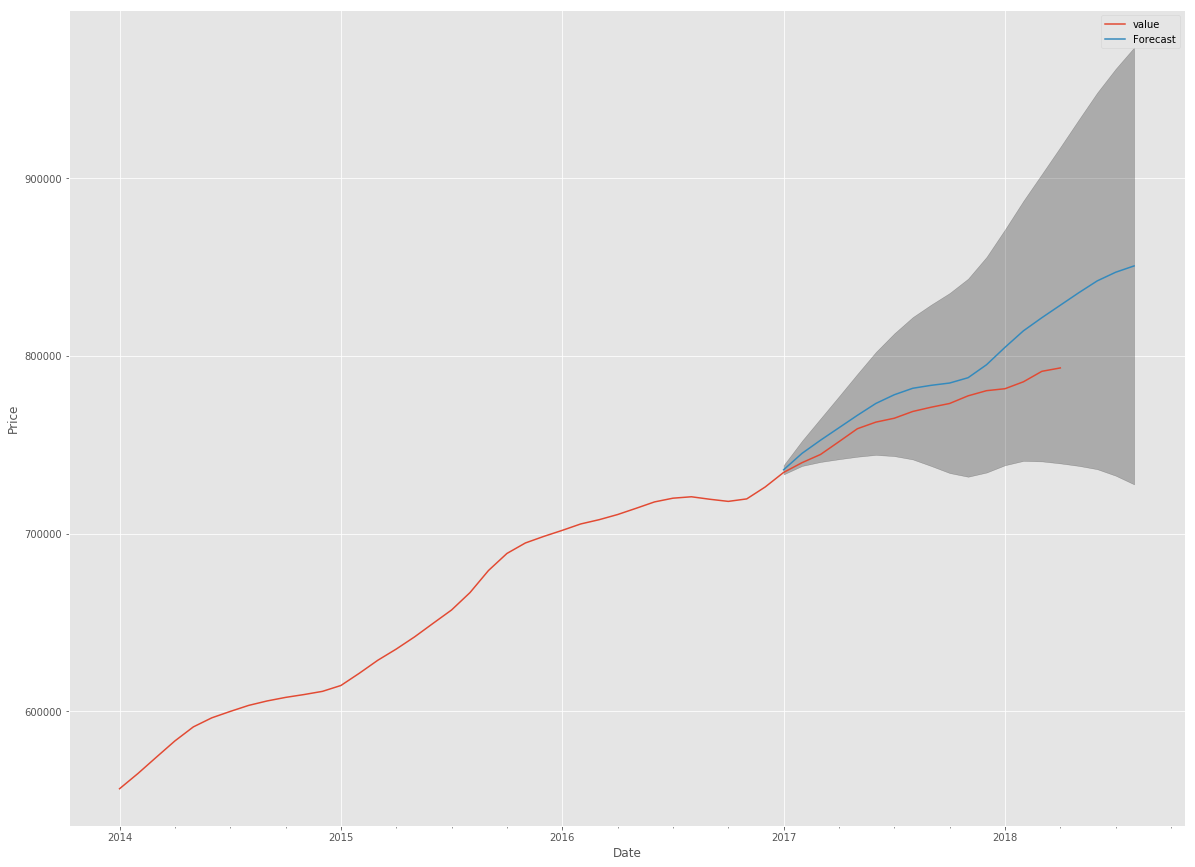

In [135]:
# Plot future predictions with confidence intervals

ax = melted20001['2014':].plot(label='observed', figsize=(20, 15))
dynamicprediction20001_2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf20001_2.index,
                pred_conf20001_2.iloc[:, 0],
                pred_conf20001_2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

# Interpreting Results